In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from scipy import signal
from scipy import stats
from tqdm import tqdm
from shapely.wkt import loads
from shapely.geometry import Point
from statsmodels.tsa.stattools import acf, pacf

In [4]:
stations_debit = pd.read_csv("../Data/Base/Stations_Debit.csv")
stations_meteo = pd.read_csv("../Data/Base/Stations_Meteo.csv")
mesures = pd.read_csv("../Data/Base/Mesures.csv")
mesures["Date"] = pd.to_datetime(mesures["Date"], format = "%Y/%m/%d %H:%M:%S")

## Explorations

In [5]:
n_cours_eau = 3
cours_eau = list(np.unique(stations_debit["Cours eau"]))
cours_eau_cmap = cm.get_cmap(ListedColormap(["red", "green", "blue"]))
cours_eau_couleur = pd.DataFrame({"Cours eau": cours_eau, "Index": range(n_cours_eau), "Couleur": ["red", "green", "blue"]})
cours_eau_couleur

Cours eau  Index Couleur
0   Garonne      0     red
1     Loire      1   green
2     Seine      2    blue

In [6]:
stations_debit.loc[:,"geometry"] = stations_debit['geometry'].apply(loads)
stations_debit = stations_debit.replace(to_replace=cours_eau, value=range(len(cours_eau)))
stations_debit = gpd.GeoDataFrame(stations_debit,
                                   geometry = "geometry")
stations_debit

Code station                                    Libelle station  \
0      O0200020  La Garonne [partielle] à Saint-Gaudens [Valent...   
1      O2620010                    La Garonne à Verdun-sur-Garonne   
2      O6140010                           La Garonne à Lamagistère   
3      O9000010                              La Garonne à Tonneins   
4      K0030020             La Loire à Issarlès [Pont de La Borie]   
5      K0100020                                  La Loire à Goudet   
6      K0260020     La Loire à Chadrac [Pont du Monteil à Chadrac]   
7      K0550010                           La Loire à Bas-en-Basset   
8      K0690010                      La Loire à Montrond-les-Bains   
9      K0910050           La Loire à Villerest [Pont de Villerest]   
10     K4180010                                    La Loire à Gien   
11     K4350020                   La Loire à Orléans [Quai du Roi]   
12     K6830020                                La Loire à Langeais   
13     L8000020                                  La Loire à Saumur   
14     M5300010                      La Loire à Montjean-sur-Loire   
15     H0100010                           La Seine à Nod-sur-Seine   
16     H0100020                     La Seine à Plaines-Saint-Lange   
17     H0400010                           La Seine à Bar-sur-Seine   
18     H0400020                               La Seine à Courtenot   
19     H0800011              La Seine [partielle] à Troyes [Foicy]   
20     H0800012          La Seine [partielle] à Troyes [Tauxelles]   
21     H0810010  La Seine à Méry-sur-Seine [après création gran...   
22     H1700010                          La Seine à Pont-sur-Seine   
23     H3930020  La Seine à Saint-Fargeau-Ponthierry [Sainte-As...   
24     H4340020                             La Seine à Alfortville   
25     H8100021                                  La Seine à Vernon   

       Regime influencé  Altitude du zéro de l'échelle  \
0     pas ou faiblement                         357.00   
1     pas ou faiblement                          90.00   
2     pas ou faiblement                          46.00   
3     pas ou faiblement                           0.00   
4             fortement                         881.34   
5             fortement                           0.00   
6   fortement en étiage                         589.50   
7             fortement                         442.00   
8             fortement                         339.11   
9             fortement                         267.51   
10            fortement                         120.97   
11  fortement en étiage                          89.82   
12            fortement                          34.51   
13    pas ou faiblement                          24.12   
14    pas ou faiblement                           9.58   
15    pas ou faiblement                         248.25   
16    pas ou faiblement                         179.35   
17    pas ou faiblement                         148.00   
18    pas ou faiblement                           0.00   
19            fortement                         102.00   
20            fortement                         100.00   
21            fortement                          78.00   
22            fortement                          60.00   
23            fortement                          34.72   
24    pas ou faiblement                          29.46   
25                  NaN                           9.16   

                     geometry  Ordre  Cours eau  
0    POINT (0.70680 43.09775)      0          0  
1    POINT (1.24218 43.85463)      1          0  
2    POINT (0.83130 44.12107)      2          0  
3    POINT (0.22215 44.41193)      3          0  
4    POINT (4.04849 44.81973)      0          1  
5    POINT (3.92189 44.88905)      1          1  
6    POINT (3.90369 45.06796)      2          1  
7    POINT (4.11799 45.29523)      3          1  
8    POINT (4.22536 45.64333)      4          1  
9    POINT (4.04622 45.99586)      5         

C:\Users\44493\AppData\Local\Temp/ipykernel_15404/2588900246.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  france = world[world['name'] == "France"].geometry.explode().values[[1, 2]].unary_union()


<AxesSubplot:>

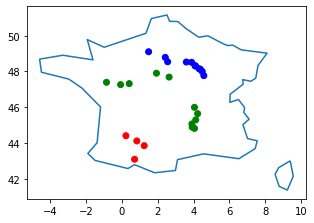

In [7]:
# On a 26 stations
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
france = world[world['name'] == "France"].geometry.explode().values[[1, 2]].unary_union()
base = gpd.GeoSeries(france).boundary.plot(figsize = (5, 5))
stations_debit.plot(ax = base, color = cours_eau_cmap(stations_debit["Cours eau"]))

In [8]:
mesures_2010 = mesures[mesures["Date"].apply(lambda x: x.year) == 2010]

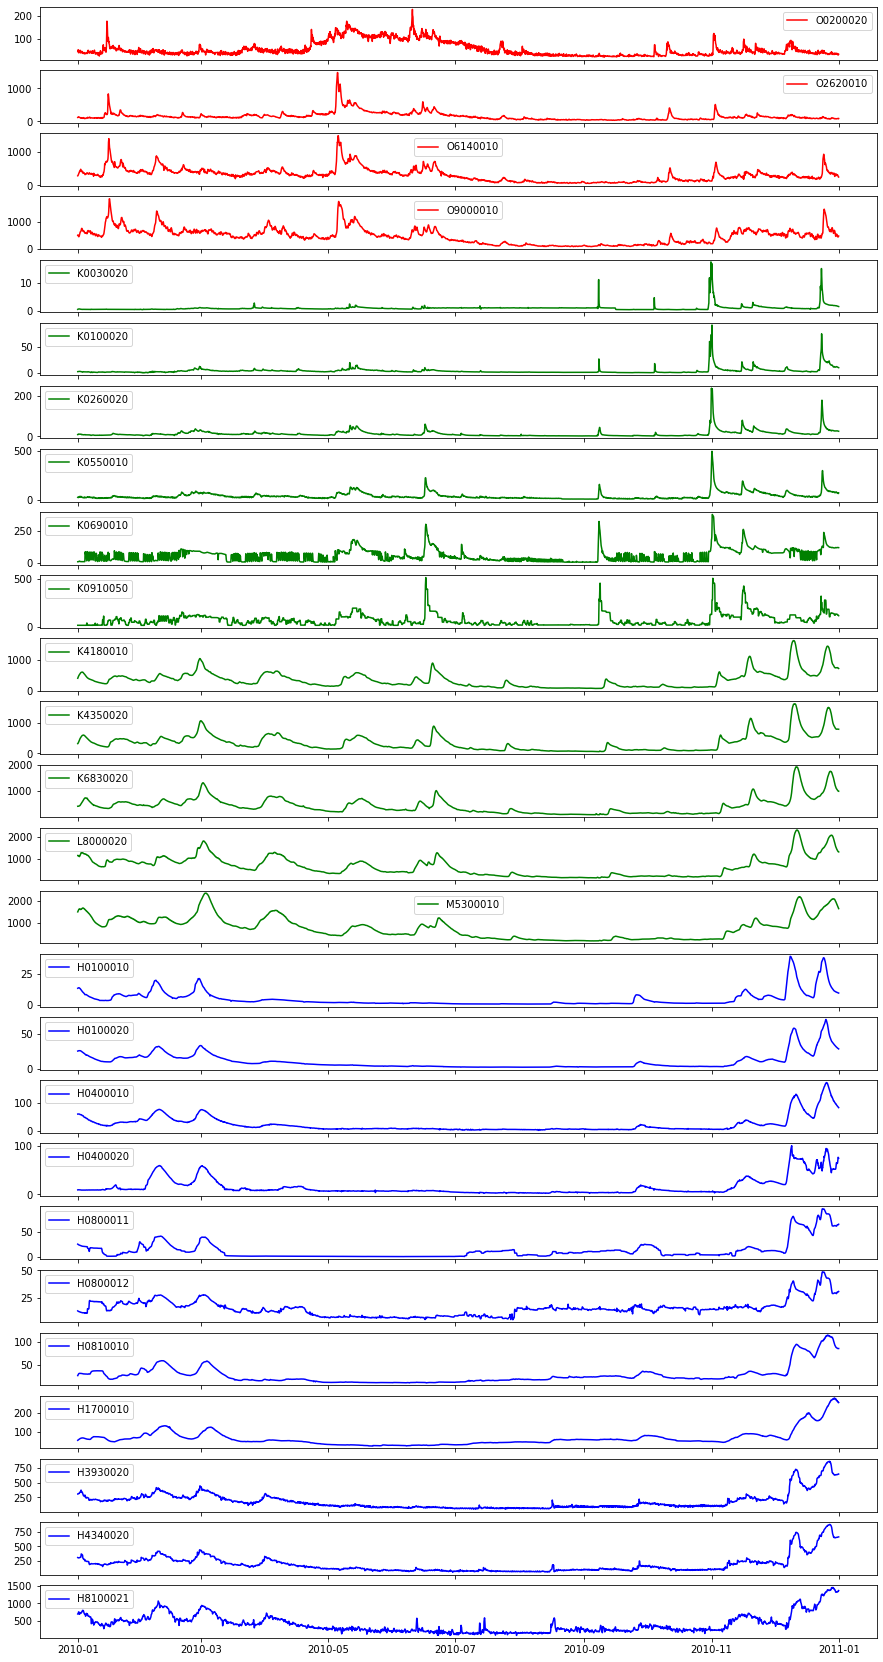

In [9]:
n_stations = stations_debit.shape[0]
fig, axs = plt.subplots(n_stations, 1, figsize = (15,30), sharex=True)
for i in range(n_stations):
    code = stations_debit.iloc[i]["Code station"]
    axs[i].plot(mesures_2010["Date"], mesures_2010[code], label = code, 
                color = cours_eau_cmap(stations_debit.iloc[i]["Cours eau"]))
    axs[i].legend()

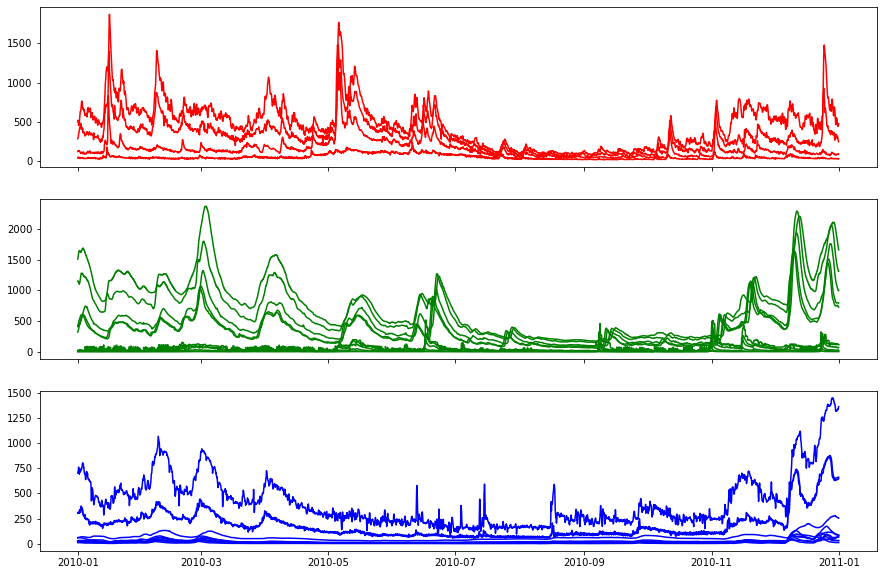

In [10]:
fig, axs = plt.subplots(n_cours_eau, 1, figsize = (15,10), sharex=True)
for i in range(n_cours_eau):
    stations = list(stations_debit[stations_debit["Cours eau"] == i]["Code station"])
    for code in stations:
        axs[i].plot(mesures_2010["Date"], mesures_2010[code],
                   color = cours_eau_cmap(i))

On regarde les distributions en fonction des fleuves.

In [11]:
# Pour chaque station, on regarde les quantiles, la moyenne, la variance, et on regarde les distrib
n_stations = stations_debit.shape[0]

stations_debit["Moyenne"] = [mesures[code].mean() for code in stations_debit["Code station"]]
stations_debit["Variance"] = [mesures[code].var() for code in stations_debit["Code station"]]
stations_debit["q025"] = [mesures[code].quantile(q = 0.25) for code in stations_debit["Code station"]]
stations_debit["q05"] = [mesures[code].quantile(q = 0.5) for code in stations_debit["Code station"]]
stations_debit["q075"] = [mesures[code].quantile(q = 0.75) for code in stations_debit["Code station"]]

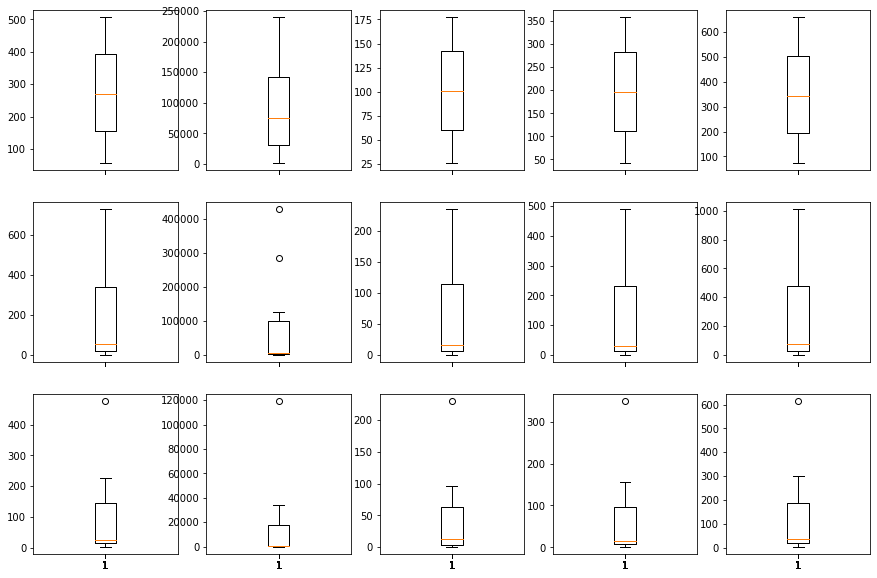

In [12]:
fig, axs = plt.subplots(n_cours_eau, 5, figsize = (15,10), sharex=True)
for i in range(n_cours_eau):
    axs[i, 0].boxplot(stations_debit[stations_debit["Cours eau"] == i]["Moyenne"])
    axs[i, 1].boxplot(stations_debit[stations_debit["Cours eau"] == i]["Variance"])
    axs[i, 2].boxplot(stations_debit[stations_debit["Cours eau"] == i]["q025"])
    axs[i, 3].boxplot(stations_debit[stations_debit["Cours eau"] == i]["q05"])
    axs[i, 4].boxplot(stations_debit[stations_debit["Cours eau"] == i]["q075"])

On regarde si la moyenne et la variance bougent significativement en fonction des mois.

In [13]:
for current_month in range(1,13):
    mesures_month = mesures[mesures["Date"].apply(lambda x: x.month) == current_month]
    stations_debit["Moyenne_" + str(current_month)] = [mesures_month[code].mean() for code in stations_debit["Code station"]]
    stations_debit["Variance_" + str(current_month)] = [mesures_month[code].var() for code in stations_debit["Code station"]]

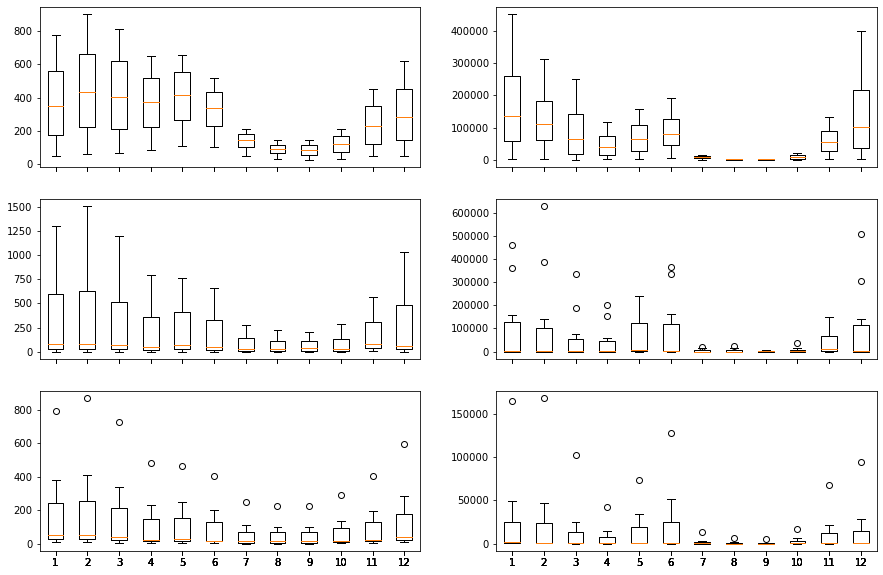

In [14]:
fig, axs = plt.subplots(n_cours_eau, 2, figsize = (15,10), sharex=True)
for i in range(n_cours_eau):
    data = []
    for current_month in range(1,13):
        data.append(list(stations_debit[stations_debit["Cours eau"] == i]["Moyenne_" + str(current_month)]))
    axs[i,0].boxplot(data)
    data = []
    for current_month in range(1,13):
        data.append(list(stations_debit[stations_debit["Cours eau"] == i]["Variance_" + str(current_month)]))
    axs[i,1].boxplot(data)

Autocorrélations

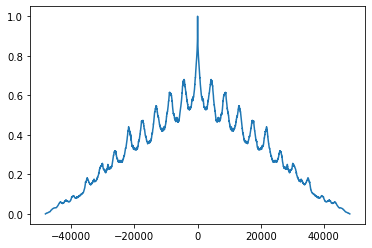

In [15]:
station = stations_debit["Code station"][0]
corr= signal.correlate(mesures[station], mesures[station], mode = "full")
corr /= np.max(corr)

origine = len(mesures)-1
plt.plot([i-origine for i in range(len(mesures)*2-1)], corr)
# On voit déjà qu'il faut prendre en compte la saisonnalité

### Desaisonnalisation Méthode 1
On essaie un truc à la zob, fait la moyenne pour chaque date/heure, et on enlève.

In [16]:
saisonnalite = pd.DataFrame({"Mois": range(1,13)})
saisonnalite = saisonnalite.merge(pd.DataFrame({"Jour": range(1,32)}), how = "cross")
saisonnalite = saisonnalite.merge(pd.DataFrame({"Heure": [2*i for i in range(12)]}), how = "cross")
saisonnalite 

Mois  Jour  Heure
0        1     1      0
1        1     1      2
2        1     1      4
3        1     1      6
4        1     1      8
...    ...   ...    ...
4459    12    31     14
4460    12    31     16
4461    12    31     18
4462    12    31     20
4463    12    31     22

[4464 rows x 3 columns]

In [17]:
mesures_stations = mesures[["Date"] + list(stations_debit["Code station"])]
compo_stations = []
for curr_mois in tqdm(range(1,13)):
    mesures_mois = mesures_stations[mesures_stations["Date"].apply(lambda x: x.month == curr_mois)]
    for curr_jour in range(1,32):
        mesures_jour = mesures_mois[mesures_mois["Date"].apply(lambda x: x.day == curr_jour)]
        for curr_heure in [2*i for i in range(12)]:
            if len(mesures_jour)>0:
                mesures_heure = mesures_jour[mesures_jour["Date"].apply(lambda x: x.hour == curr_heure)]
                compo = list(mesures_heure[list(stations_debit["Code station"])].mean())
                compo_stations.append(compo)
            else:
                comp = [np.nan for i in range(n_stations)]
                compo_stations.append(compo)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:13<00:00,  1.15s/it]


In [18]:
saisonnalite[list(stations_debit["Code station"])] = compo_stations
saisonnalite

Mois  Jour  Heure   O0200020    O2620010    O6140010    O9000010  \
0        1     1      0  41.254545  125.800000  317.363636  547.363636   
1        1     1      2  42.318182  121.918182  313.272727  549.545455   
2        1     1      4  43.600000  119.763636  315.727273  545.272727   
3        1     1      6  43.281818  120.190909  322.272727  533.818182   
4        1     1      8  41.027273  123.509091  325.454545  517.545455   
...    ...   ...    ...        ...         ...         ...         ...   
4459    12    31     14  37.272727  150.945455  377.454545  643.454545   
4460    12    31     16  38.154545  148.636364  395.727273  653.545455   
4461    12    31     18  40.263636  145.145455  383.727273  657.090909   
4462    12    31     20  41.045455  142.681818  381.727273  660.272727   
4463    12    31     22  41.190909  141.890909  381.818182  669.909091   

      K0030020  K0100020   K0260020  ...   H0100020   H0400010   H0400020  \
0     0.895455  4.428182  14.480000  ...  21.971818  56.910000  36.613636   
1     0.893636  4.404545  14.418182  ...  21.967273  56.865455  36.806364   
2     0.897273  4.357273  14.392727  ...  21.961818  56.810000  36.980000   
3     0.900909  4.339091  14.191818  ...  21.978182  56.787273  37.055455   
4     0.899091  4.336364  14.086364  ...  22.005455  56.819091  37.189091   
...        ...       ...        ...  ...        ...        ...        ...   
4459  0.944545  4.597273  15.385455  ...  21.823636  57.060909  39.209091   
4460  0.940000  4.556364  15.217273  ...  21.814545  57.194545  39.603636   
4461  0.935455  4.514545  15.077273  ...  21.756364  57.130909  39.764545   
4462  0.930909  4.482727  14.917273  ...  21.787273  57.105455  39.884545   
4463  0.927273  4.459091  14.804545  ...  21.792727  57.090000  39.995455   

       H0800011   H0800012   H0810010    H1700010    H3930020    H4340020  \
0     35.290909  22.506364  52.354545  122.018182  350.009091  367.463636   
1     35.328182  22.503636  52.536364  121.981818  350.272727  368.036364   
2     35.411818  22.518182  52.727273  122.309091  352.390909  367.672727   
3     35.456364  22.511818  52.945455  122.345455  353.190909  366.645455   
4     35.545455  22.560000  53.136364  122.572727  352.100000  368.672727   
...         ...        ...        ...         ...         ...         ...   
4459  34.381818  23.240000  53.063636  123.372727  356.418182  380.772727   
4460  34.526364  23.322727  53.154545  123.636364  356.536364  378.518182   
4461  34.726364  23.391818  53.263636  123.563636  357.418182  377.836364   
4462  34.933636  23.425455  53.336364  123.472727  357.663636  377.272727   
4463  35.170909  23.453636  53.436364  123.800000  357.600000  377.527273   

        H8100021  
0     811.727273  
1     804.363636  
2     799.090909  
3     797.181818  
4     795.181818  
...          ...  
4459  834.000000  
4460  831.636364  
4461  830.636364  
4462  832.090909  
4463  832.363636  

[4464 rows x 29 columns]

In [19]:
mesures_debit_desaison = mesures[["Date"]].copy()
for code in tqdm(stations_debit["Code station"]):
    mesures_station = mesures[["Date", code]].copy()
    mesures_station["Mois"] = mesures_station["Date"].apply(lambda x: x.month)
    mesures_station["Jour"] = mesures_station["Date"].apply(lambda x: x.day)
    mesures_station["Heure"] = mesures_station["Date"].apply(lambda x: x.hour)
    mesures_station = mesures_station.merge(saisonnalite[["Mois", "Jour", "Heure", code]], how = "left", suffixes=(None, "_saison"),
                                            on = ["Mois", "Jour", "Heure"])
    mesures_debit_desaison[code] = mesures_station[code] - mesures_station[code+"_saison"]

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:14<00:00,  1.79it/s]


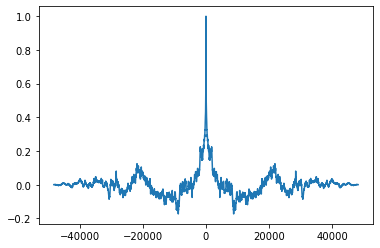

In [20]:
station = stations_debit["Code station"][0]
corr= signal.correlate(mesures_debit_desaison[station], mesures_debit_desaison[station], mode = "full")
corr /= np.max(corr)

origine = len(mesures_debit_desaison)-1
plt.plot([i-origine for i in range(len(mesures_debit_desaison)*2-1)], corr)

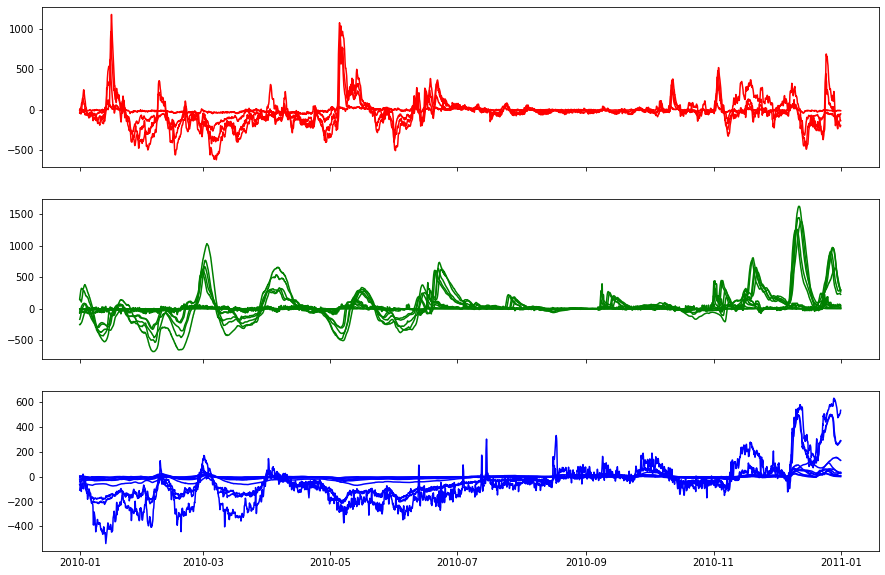

In [21]:
fig, axs = plt.subplots(n_cours_eau, 1, figsize = (15,10), sharex=True)
for i in range(n_cours_eau):
    stations = list(stations_debit[stations_debit["Cours eau"] == i]["Code station"])
    for code in stations:
        axs[i].plot(mesures_2010["Date"], mesures_debit_desaison[mesures["Date"].apply(lambda x: x.year == 2010)][code],
                   color = cours_eau_cmap(i))

C'est quand même mieux

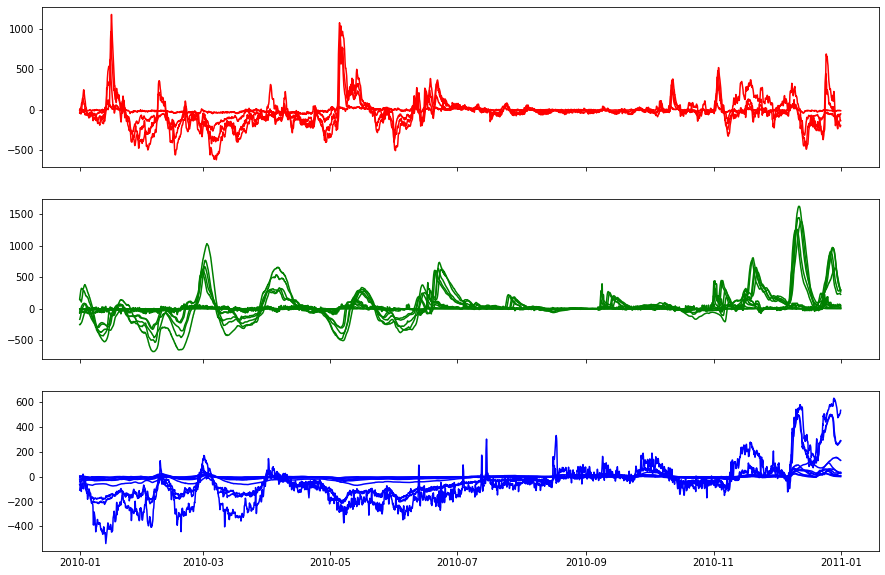

In [22]:
fig, axs = plt.subplots(n_cours_eau, 1, figsize = (15,10), sharex=True)
for i in range(n_cours_eau):
    stations = list(stations_debit[stations_debit["Cours eau"] == i]["Code station"])
    for code in stations:
        axs[i].plot(mesures_2010["Date"], mesures_debit_desaison[mesures["Date"].apply(lambda x: x.year == 2010)][code],
                   color = cours_eau_cmap(i))

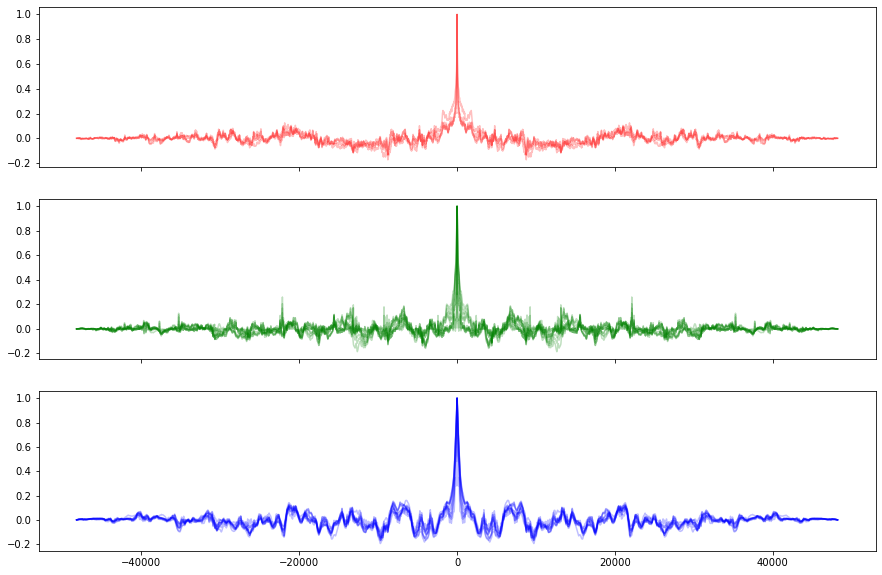

In [23]:
fig, axs = plt.subplots(n_cours_eau, 1, figsize = (15,10), sharex=True)
origine = len(mesures_debit_desaison)-1
for i in range(n_cours_eau):
    stations = list(stations_debit[stations_debit["Cours eau"] == i]["Code station"])
    for code in stations:
        corr= signal.correlate(mesures_debit_desaison[code], mesures_debit_desaison[code], mode = "full")
        corr /= np.max(corr)
        axs[i].plot([i-origine for i in range(len(mesures_debit_desaison)*2-1)], corr,
                   color = cours_eau_cmap(i),
                   alpha = 0.25)

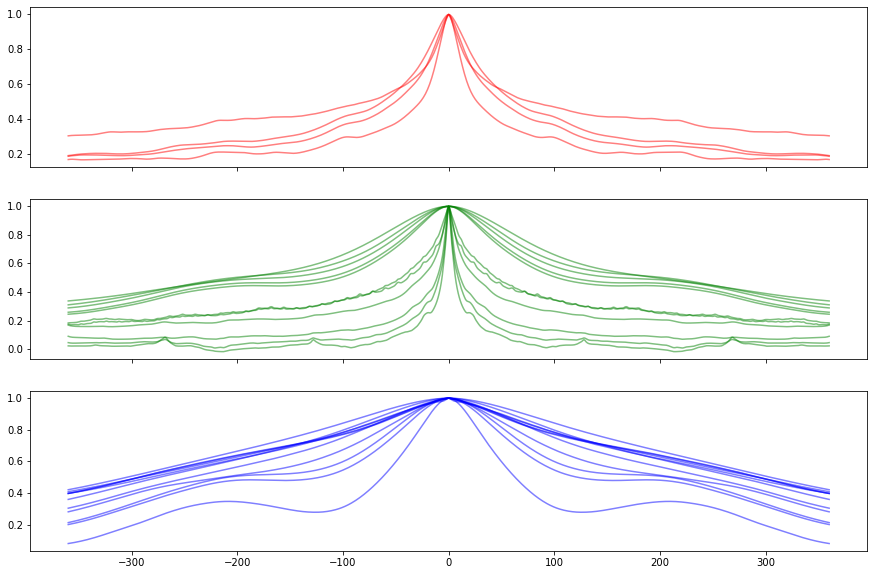

In [24]:
fig, axs = plt.subplots(n_cours_eau, 1, figsize = (15,10), sharex=True)
origine = len(mesures_debit_desaison)-1
max_lag = 12*30 # 1 mois
for i in range(n_cours_eau):
    stations = list(stations_debit[stations_debit["Cours eau"] == i]["Code station"])
    for code in stations:
        corr= signal.correlate(mesures_debit_desaison[code], mesures_debit_desaison[code], mode = "full")
        corr /= np.max(corr)
        axs[i].plot([i-max_lag for i in range(max_lag*2+1)], corr[(origine-max_lag):(origine+max_lag+1)],
                   color = cours_eau_cmap(i),
                   alpha = 0.5)

On regarde la PACF

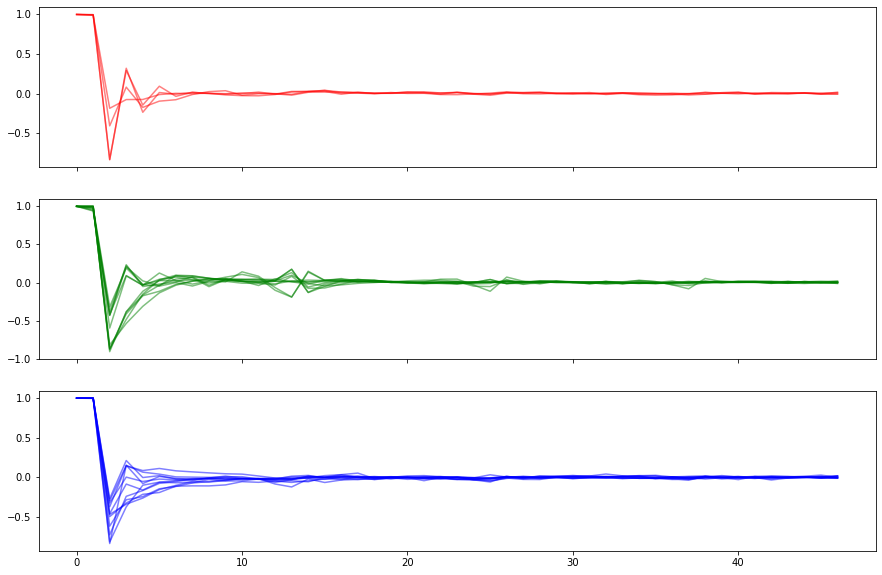

In [25]:
fig, axs = plt.subplots(n_cours_eau, 1, figsize = (15,10), sharex=True)
origine = len(mesures_debit_desaison)-1
max_lag = 12*30 # 1 mois
for i in range(n_cours_eau):
    stations = list(stations_debit[stations_debit["Cours eau"] == i]["Code station"])
    for code in stations:
        corr= pacf(mesures_debit_desaison[code], method = "ols-adjusted")
        axs[i].plot(corr,
                   color = cours_eau_cmap(i),
                   alpha = 0.5)

Correlation croisées

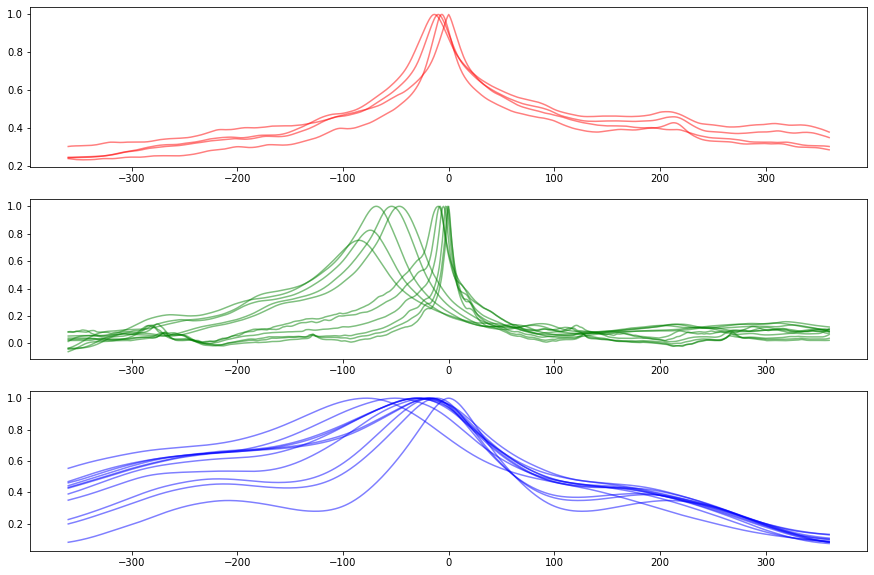

In [26]:
fig, axs = plt.subplots(n_cours_eau, 1, figsize = (15,10))
origine = len(mesures_debit_desaison)-1
max_lag = 12*30 # 1 mois

for i in range(n_cours_eau):
    station_amont = stations_debit[(stations_debit["Cours eau"] == i) & (stations_debit["Ordre"] == 0)]["Code station"].values[0]
    stations = list(stations_debit[stations_debit["Cours eau"] == i]["Code station"])
    for code in stations:
        corr= signal.correlate(mesures_debit_desaison[station_amont], mesures_debit_desaison[code], mode = "full")
        corr /= np.max(corr)
        axs[i].plot([i-max_lag for i in range(max_lag*2+1)], corr[(origine-max_lag):(origine+max_lag+1)],
                   color = cours_eau_cmap(i),
                   alpha = 0.5)

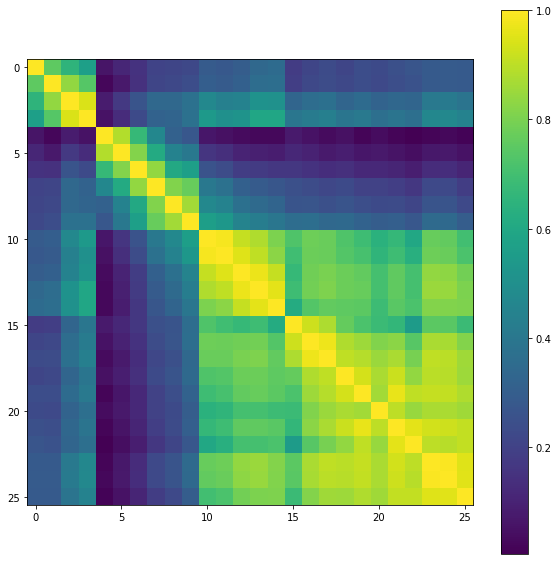

In [27]:
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(mesures_debit_desaison.corr())
fig.colorbar(im)

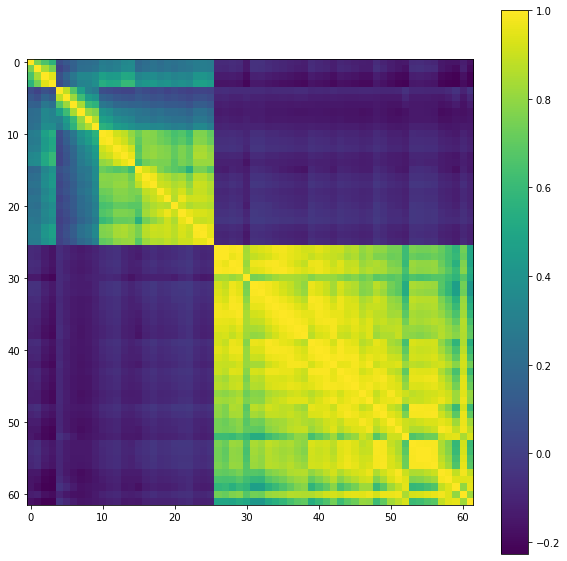

In [28]:
mesures_debit_desaison_pression = mesures_debit_desaison.merge(mesures.filter(regex="Date|Pression.*"))
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(mesures_debit_desaison_pression.corr())
fig.colorbar(im)

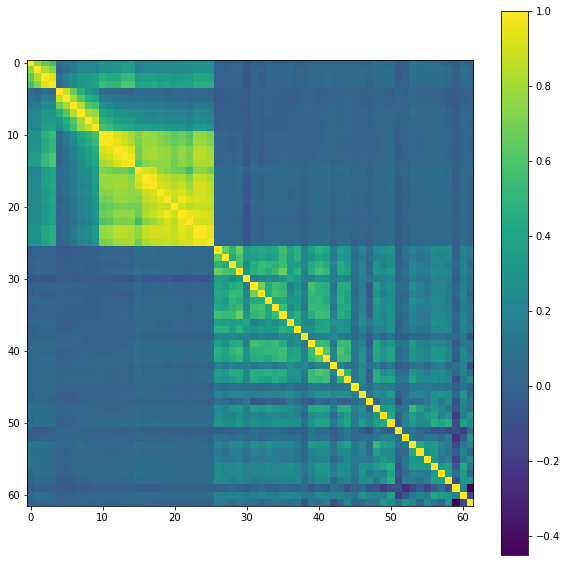

In [29]:
mesures_debit_desaison_direction_vent = mesures_debit_desaison.merge(mesures.filter(regex="Date|Direction_vent.*"))
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(mesures_debit_desaison_direction_vent.corr())
fig.colorbar(im)

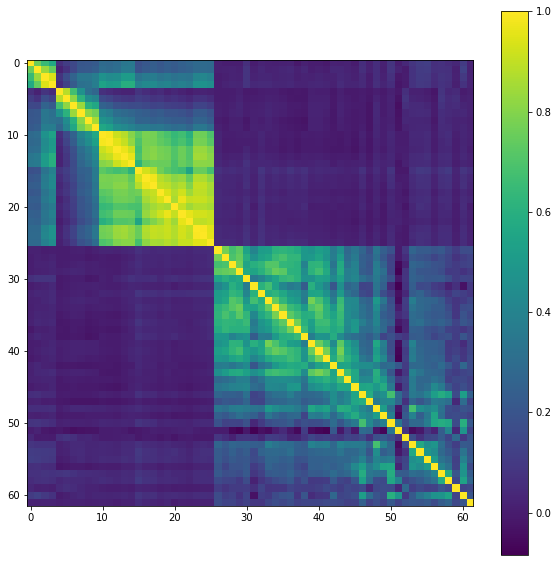

In [30]:
mesures_debit_desaison_vitesse_vent = mesures_debit_desaison.merge(mesures.filter(regex="Date|Vitesse_vent.*"))
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(mesures_debit_desaison_vitesse_vent.corr())
fig.colorbar(im)

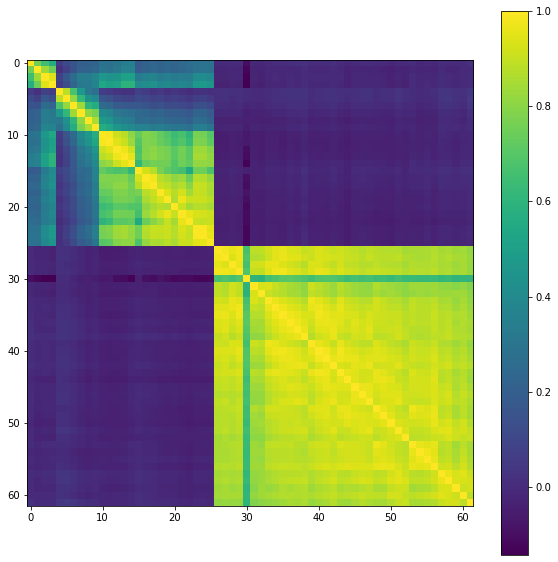

In [31]:
mesures_debit_desaison_temperature = mesures_debit_desaison.merge(mesures.filter(regex="Date|Temperature.*"))
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(mesures_debit_desaison_temperature.corr())
fig.colorbar(im)

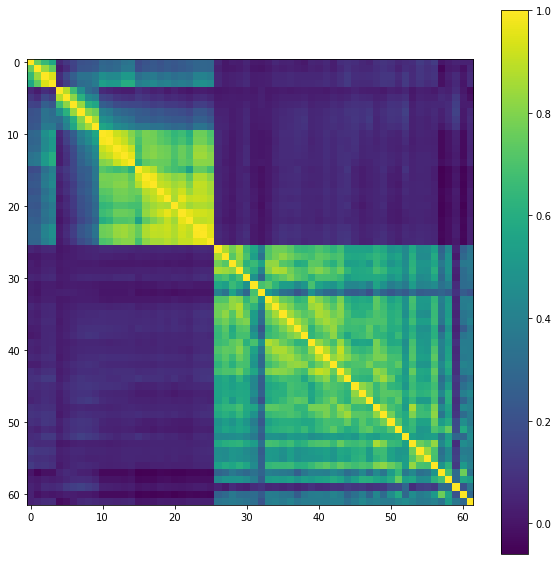

In [32]:
mesures_debit_desaison_humidite = mesures_debit_desaison.merge(mesures.filter(regex="Date|Humidite.*"))
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(mesures_debit_desaison_humidite.corr())
fig.colorbar(im)

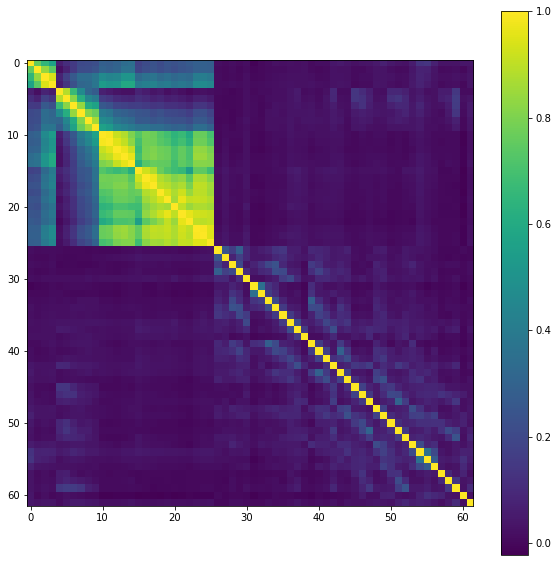

In [33]:
mesures_debit_desaison_precipitations = mesures_debit_desaison.merge(mesures.filter(regex="Date|Precipitations.*"))
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(mesures_debit_desaison_precipitations.corr())
fig.colorbar(im)

### Desaisonnalisation Méthode 2: gaussian smoothing
On essaye d'estimer la partie périodique de SC débit d'eau d'une station, en moyennant les lissages gaussiens de 11 années.


26it [00:00, 52.95it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1135.20it/s]


O0200020    O2620010    O6140010    O9000010  K0030020  K0100020  \
0      38.921634  130.031883  334.386736  525.287735  0.888085  4.289674   
1      38.921634  130.031883  334.386736  525.287735  0.888085  4.289674   
2      38.921634  130.031883  334.386736  525.287735  0.888085  4.289674   
3      38.921634  130.031883  334.386736  525.287735  0.888085  4.289674   
4      38.921634  130.031883  334.386736  525.287735  0.888085  4.289674   
...          ...         ...         ...         ...       ...       ...   
48211  41.305161  154.315454  405.274481  698.387667  0.952283  4.657727   
48212  41.305161  154.315454  405.274481  698.387667  0.952283  4.657727   
48213  38.921634  130.031883  334.386736  525.287735  0.888085  4.289674   
48214  38.921634  130.031883  334.386736  525.287735  0.888085  4.289674   
48215  38.921634  130.031883  334.386736  525.287735  0.888085  4.289674   

        K0260020   K0550010   K0690010   K0910050  ...   H0100020   H0400010  \
0      13.739790  38.939341  49.749687  65.572631  ...  22.456614  56.537324   
1      13.739790  38.939341  49.749687  65.572631  ...  22.456614  56.537324   
2      13.739790  38.939341  49.749687  65.572631  ...  22.456614  56.537324   
3      13.739790  38.939341  49.749687  65.572631  ...  22.456614  56.537324   
4      13.739790  38.939341  49.749687  65.572631  ...  22.456614  56.537324   
...          ...        ...        ...        ...  ...        ...        ...   
48211  14.777748  42.330461  56.496258  77.469314  ...  21.684184  56.432639   
48212  14.777748  42.330461  56.496258  77.469314  ...  21.684184  56.432639   
48213  13.739790  38.939341  49.749687  65.572631  ...  22.456614  56.537324   
48214  13.739790  38.939341  49.749687  65.572631  ...  22.456614  56.537324   
48215  13.739790  38.939341  49.749687  65.572631  ...  22.456614  56.537324   

        H0400020   H0800011   H0800012  H0810010    H1700010    H3930020  \
0      37.184125  36.916911  23.148556  54.21538  123.280993  356.070560   
1      37.184125  36.916911  23.148556  54.21538  123.280993  356.070560   
2      37.184125  36.916911  23.148556  54.21538  123.280993  356.070560   
3      37.184125  36.916911  23.148556  54.21538  123.280993  356.070560   
4      37.184125  36.916911  23.148556  54.21538  123.280993  356.070560   
...          ...        ...        ...       ...         ...         ...   
48211  36.606886  33.418058  23.104307  52.25196  122.597000  363.979531   
48212  36.606886  33.418058  23.104307  52.25196  122.597000  363.979531   
48213  37.184125  36.916911  23.148556  54.21538  123.280993  356.070560   
48214  37.184125  36.916911  23.148556  54.21538  123.280993  356.070560   
48215  37.184125  36.916911  23.148556  54.21538  123.280993  356.070560   

         H4340020    H8100021  
0      376.455622  815.984919  
1      376.455622  815.984919  
2      376.455622  815.984919  
3      376.455622  815.984919  
4      376.455622  815.984919  
...           ...         ...  
48211  386.739268  831.034290  
48212  386.739268  831.034290  
48213  376.455622  815.984919  
48214  376.455622  815.984919  
48215  376.455622  815.984919  

[48216 rows x 26 columns]

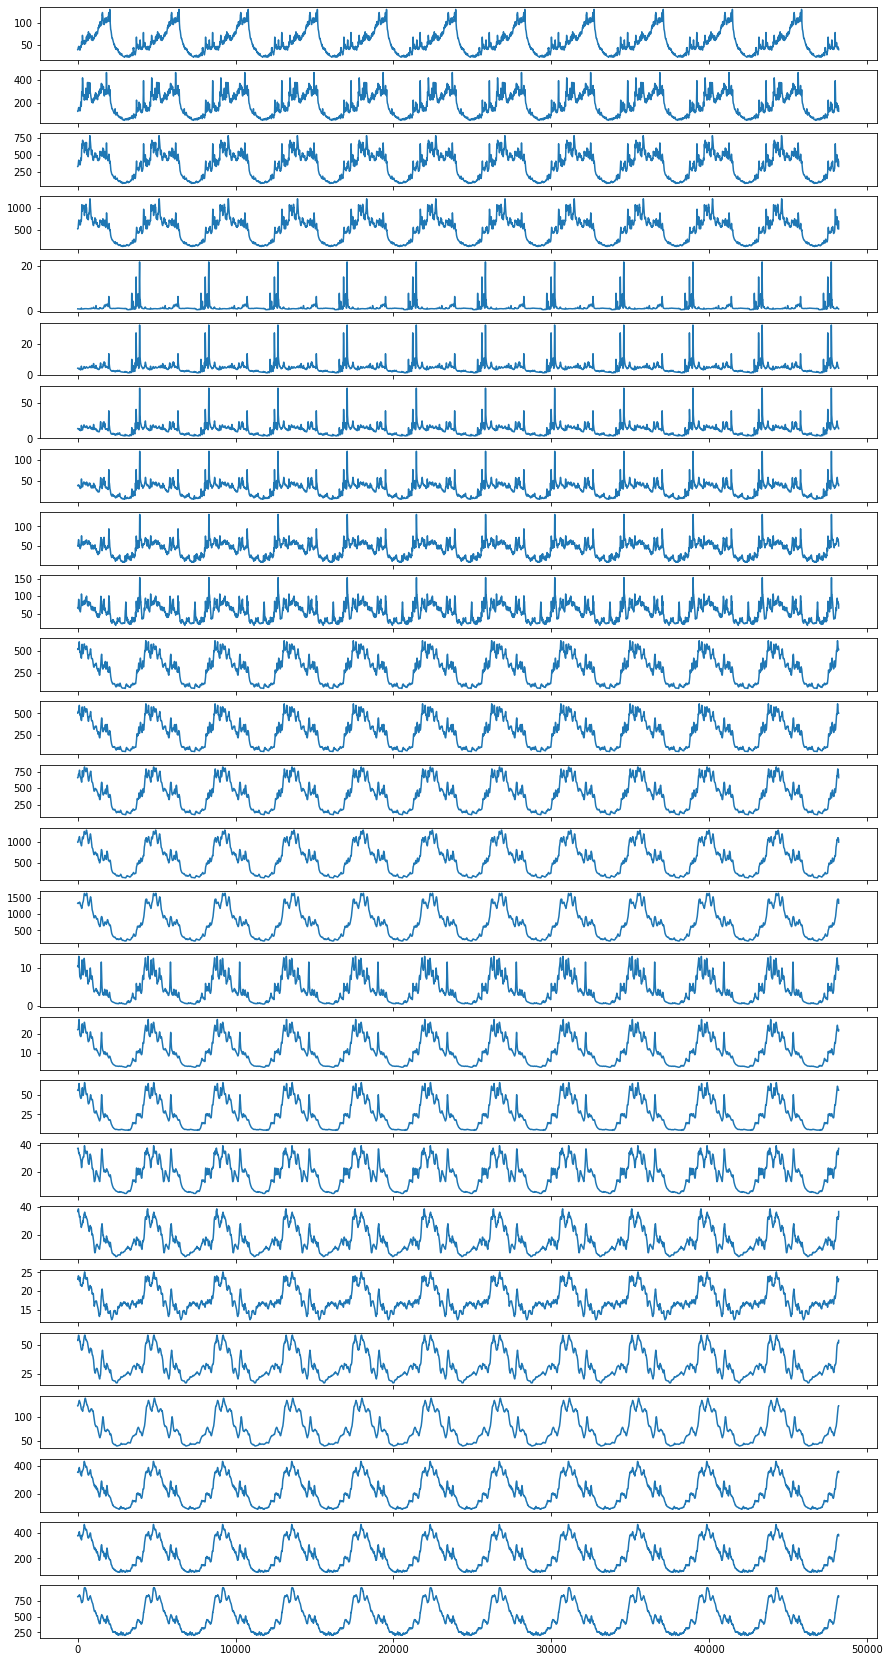

In [187]:
fig, axs = plt.subplots(len(stations_debit), 1, figsize = (15,30), sharex=True)
avg_gauss = pd.DataFrame()

for n,code in tqdm(enumerate(stations_debit["Code station"])):
    gauss_series = pd.DataFrame()
    for i in range(11):
        debit_eau_1y = pd.Series(mesures[code][4383*i: 4383*(i+1)])
        gauss_smooth = debit_eau_1y.rolling(window=24, win_type='gaussian', center=True).mean(std=25) #lissage par noyau guassien
        gauss_smooth = gauss_smooth.to_numpy()
        gauss_series[str(i)] = gauss_smooth
    avg = gauss_series.mean(axis=1)
    avg = avg.ffill().bfill()
    avg = avg.to_numpy()
    avg = np.resize(avg, len(mesures))
    avg_gauss[code] = avg.tolist()
    axs[n].plot(avg_gauss[code])
mesures_debit_desaison = pd.DataFrame()
for code in tqdm(stations_debit["Code station"]):
    mesures_debit_desaison[code] = mesures[code] - avg_gauss[code]
avg_gauss

26it [00:00, 388.44it/s]


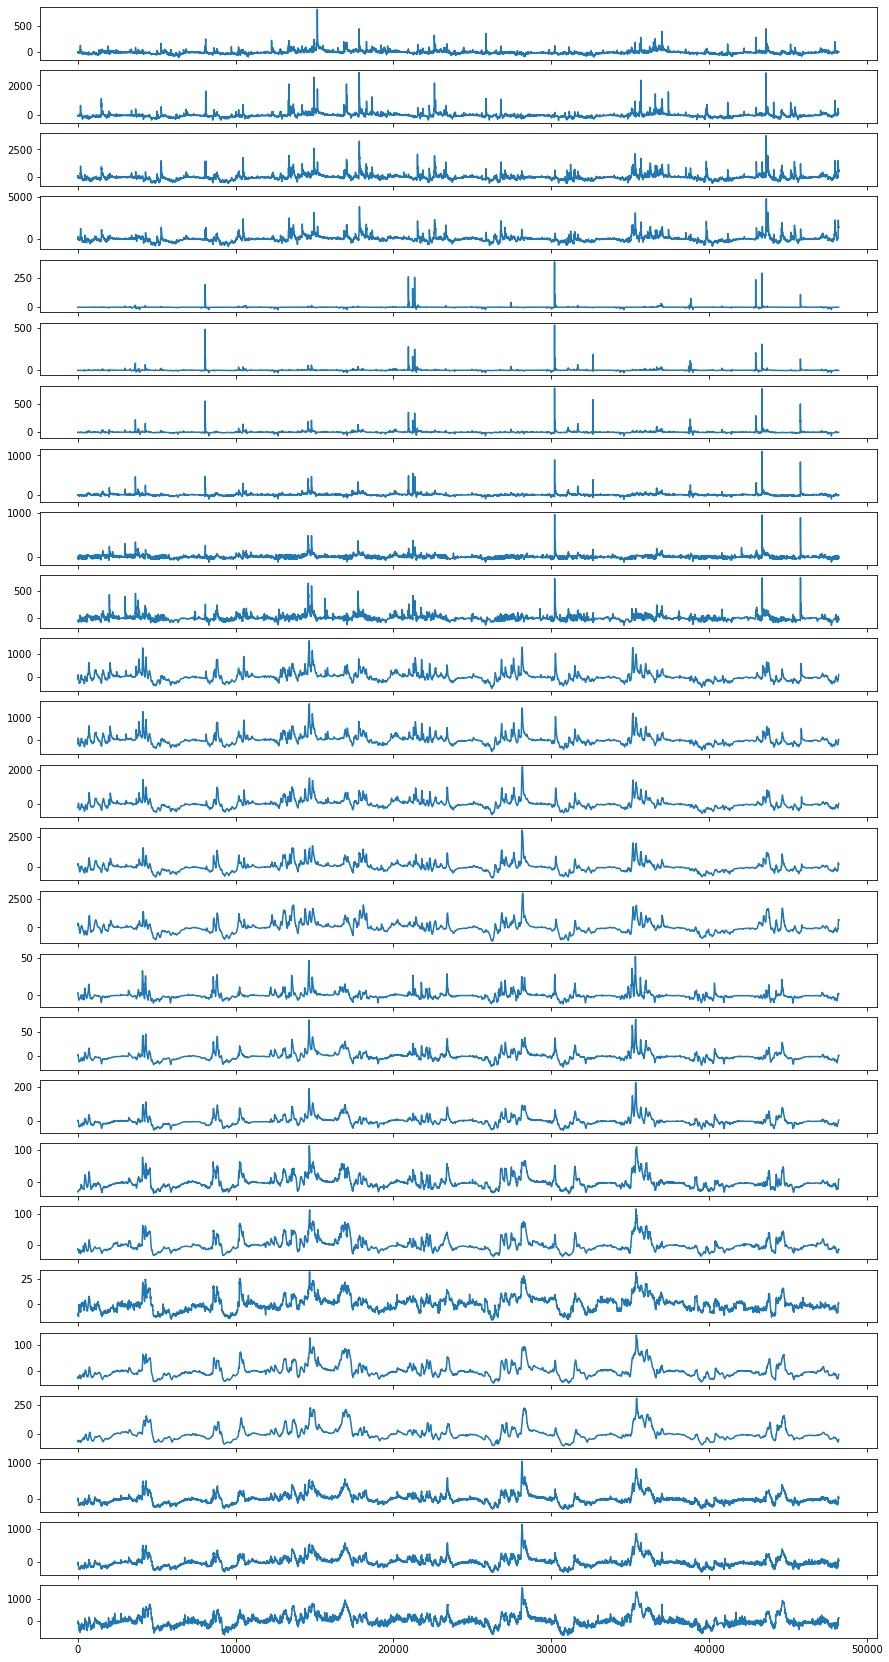

In [188]:
fig, axs = plt.subplots(len(stations_debit), 1, figsize = (15,30), sharex=True)

for n,code in tqdm(enumerate(stations_debit["Code station"])):
    axs[n].plot(mesures_debit_desaison[code])


26it [00:00, 39.47it/s]


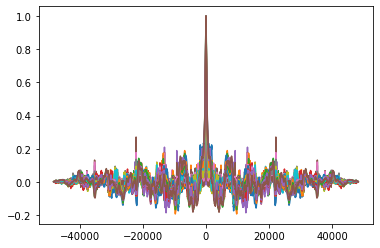

In [189]:

for n,code in tqdm(enumerate(stations_debit["Code station"])):
    corr= signal.correlate(mesures_debit_desaison[code], mesures_debit_desaison[code], mode = "full")
    corr /= np.max(corr)
    origine = len(mesures_debit_desaison)-1
    plt.plot([i-origine for i in range(len(mesures_debit_desaison)*2-1)], corr)


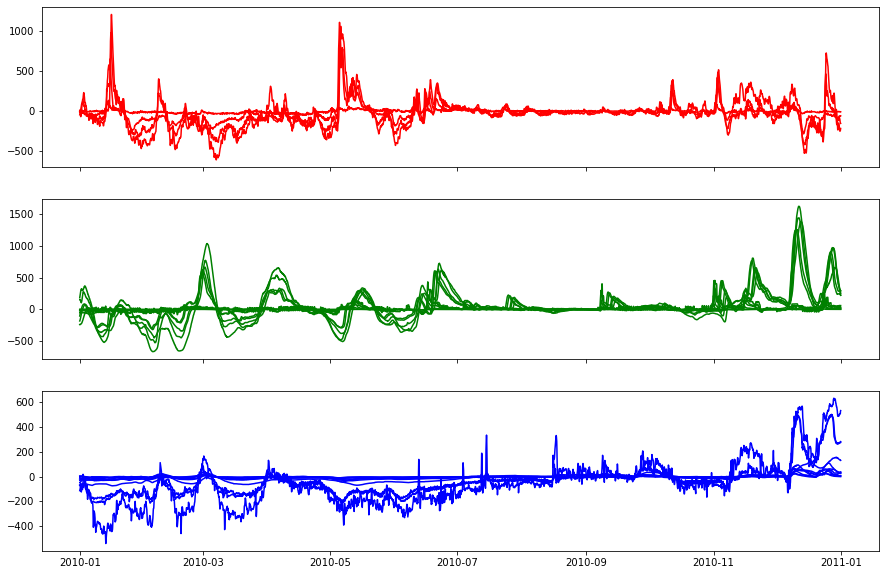

In [190]:
fig, axs = plt.subplots(n_cours_eau, 1, figsize = (15,10), sharex=True)
for i in range(n_cours_eau):
    stations = list(stations_debit[stations_debit["Cours eau"] == i]["Code station"])
    for code in stations:
        axs[i].plot(mesures_2010["Date"], mesures_debit_desaison[mesures["Date"].apply(lambda x: x.year == 2010)][code],
                   color = cours_eau_cmap(i))